# setup

In [ ]:
!pip install openml
# !pip install autogluon
# !pip install smac
!pip install scikit-optimize

In [1]:
import openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import HistGradientBoostingClassifier
import random
from scipy.stats import uniform, randint
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

In [ ]:
random.seed(37)

### importing adult set

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(45068)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['class']
X = X.drop('class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)
dummy_X = pd.get_dummies(X).drop(["sex_Male"], axis=1)

X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(dummy_X, dummy_y,test_size=0.2)


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


### importing blood-transfusion-service-center

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(1464)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['Class']
X = X.drop('Class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)

X_btsc_train, X_btsc_test, y_btsc_train, y_btsc_test = train_test_split(X, dummy_y,test_size=0.2)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


### importing diabetes

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(37)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['class']
X = X.drop('class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X, dummy_y, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


### importing phoneme

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(1489)#(1462)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['Class']
X = X.drop('Class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)

X_ba_train, X_ba_test, y_ba_train, y_ba_test = train_test_split(X, dummy_y,test_size=0.2)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


# GradientBoosting

In [ ]:
results_rs = pd.DataFrame()
results_bs = pd.DataFrame()
results_bs1 = pd.DataFrame()
results_bs2 = pd.DataFrame()
results_bs3 = pd.DataFrame()

## Param grid

In [ ]:
grid_params_rs = [{
    "max_iter": randint(1,500),
    "learning_rate": uniform(0.01,0.99),
    "max_leaf_nodes":  randint(2,50),
    "min_samples_leaf": randint(1,50),
    "max_depth": randint(1,15)
}]

In [ ]:
grid_params_bs = [{
    "max_iter": Integer(1,500),
    "learning_rate": Real(0.01,1),
    "max_leaf_nodes":  Integer(2,50),
    "min_samples_leaf": Integer(1,50),
    "max_depth": Integer(1,15)
}]

## model definitions

In [ ]:
m2 = HistGradientBoostingClassifier(random_state=21)

In [ ]:
grid = RandomizedSearchCV(m2,grid_params_rs, scoring='roc_auc', random_state=37, n_iter=50)

In [ ]:
bscv = BayesSearchCV(m2, grid_params_bs, random_state=21, scoring="roc_auc", n_iter=50)

## adult set

In [ ]:
X_train, X_test, y_train, y_test = X_a_train.copy(), X_a_test.copy(), y_a_train.copy(), y_a_test.copy()

### random search

In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
                   n_iter=50,
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae73a24c340>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae770f01c90>,
                                         'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc5ea0>,
                                         'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc7c70>,
                                         'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc7220>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["params"] = grid.cv_results_["params"]

In [ ]:
results_rs["a_scores"] = grid.cv_results_["mean_test_score"]

### bayesian optimalization

#### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'max_iter': Integer(low=1, high=500, prior='uniform', transform='normalize'),
                              'max_leaf_nodes': Integer(low=2, high=50, prior='uniform', transform='normalize'),
                              'min_samples_leaf': Integer(low=1, high=50, prior='uniform', transform='normalize')}])

In [ ]:
results_bs["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs["a_scores"] = bscv.cv_results_["mean_test_score"]

## blood-transfusion-service-center

In [ ]:
X_train, X_test, y_train, y_test = X_btsc_train.copy(), X_btsc_test.copy(), y_btsc_train.copy(), y_btsc_test.copy()

###  randomized search


In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
                   n_iter=50,
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae73a24c340>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae770f01c90>,
                                         'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc5ea0>,
                                         'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc7c70>,
                                         'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc7220>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["btsc_scores"] = grid.cv_results_["mean_test_score"]

In [ ]:
grid.best_params_

{'learning_rate': 0.04337936291096787,
 'max_depth': 1,
 'max_iter': 191,
 'max_leaf_nodes': 21,
 'min_samples_leaf': 36}

In [ ]:
rand_opt_btsc = grid.best_estimator_
rand_opt_btsc

HistGradientBoostingClassifier(learning_rate=0.04337936291096787, max_depth=1,
                               max_iter=191, max_leaf_nodes=21,
                               min_samples_leaf=36, random_state=21)

### bayesian optimization

#### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'max_iter': Integer(low=1, high=500, prior='uniform', transform='normalize'),
                              'max_leaf_nodes': Integer(low=2, high=50, prior='uniform', transform='normalize'),
                              'min_samples_leaf': Integer(low=1, high=50, prior='uniform', transform='normalize')}])

In [ ]:
results_bs1["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs1["scores"] = bscv.cv_results_["mean_test_score"]

## diabetes

In [ ]:
X_train, X_test, y_train, y_test = X_d_train.copy(), X_d_test.copy(), y_d_train.copy(), y_d_test.copy()

###  randomized search


In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
                   n_iter=50,
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae73a24c340>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae770f01c90>,
                                         'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc5ea0>,
                                         'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc7c70>,
                                         'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae739bc7220>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["d_scores"] = grid.cv_results_["mean_test_score"]

### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'max_iter': Integer(low=1, high=500, prior='uniform', transform='normalize'),
                              'max_leaf_nodes': Integer(low=2, high=50, prior='uniform', transform='normalize'),
                              'min_samples_leaf': Integer(low=1, high=50, prior='uniform', transform='normalize')}])

In [ ]:
results_bs2["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs2["scores"] = bscv.cv_results_["mean_test_score"]

## phoneme

In [ ]:
X_train, X_test, y_train, y_test = X_ba_train.copy(), X_ba_test.copy(), y_ba_train.copy(), y_ba_test.copy()

###  randomized search


In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
                   n_iter=50,
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b6f2bbf40d0>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6f2bbf53f0>,
                                         'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6f2bbaff40>,
                                         'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6f2bbf5b10>,
                                         'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b6f2bbf5240>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["ba_scores"] = grid.cv_results_["mean_test_score"]

### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=HistGradientBoostingClassifier(random_state=21),
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0.01, high=1, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'max_iter': Integer(low=1, high=500, prior='uniform', transform='normalize'),
                              'max_leaf_nodes': Integer(low=2, high=50, prior='uniform', transform='normalize'),
                              'min_samples_leaf': Integer(low=1, high=50, prior='uniform', transform='normalize')}])

In [ ]:
results_bs3["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs3["scores"] = bscv.cv_results_["mean_test_score"]

# plots

In [ ]:
# results_bs.to_csv("/drive/My Drive/gbc/results_bs.csv",index=False)

# results_bs1.to_csv("/drive/My Drive/gbc/results_bs1.csv",index=False)

# results_bs2.to_csv("/drive/My Drive/gbc/results_bs2.csv",index=False)

# results_bs3.to_csv("/drive/My Drive/gbc/results_bs3.csv",index=False)

# results_rs.to_csv("/drive/My Drive/gbc/results_rs.csv",index=False)


In [3]:
results_bs = pd.read_csv("/drive/My Drive/gbc/results_bs.csv")
results_bs1 = pd.read_csv("/drive/My Drive/gbc/results_bs1.csv")
results_bs2 = pd.read_csv("/drive/My Drive/gbc/results_bs2.csv")
results_bs3 = pd.read_csv("/drive/My Drive/gbc/results_bs3.csv")
results_rs = pd.read_csv("/drive/My Drive/gbc/results_rs.csv")

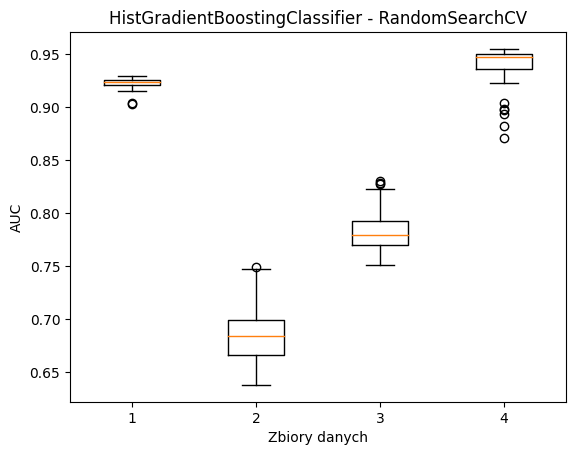

In [6]:
plt.boxplot([results_rs["a_scores"],results_rs["btsc_scores"],results_rs["d_scores"],results_rs["ba_scores"]])
plt.title("HistGradientBoostingClassifier - RandomSearchCV")
plt.xlabel("Zbiory danych")
plt.ylabel("AUC")
plt.show()

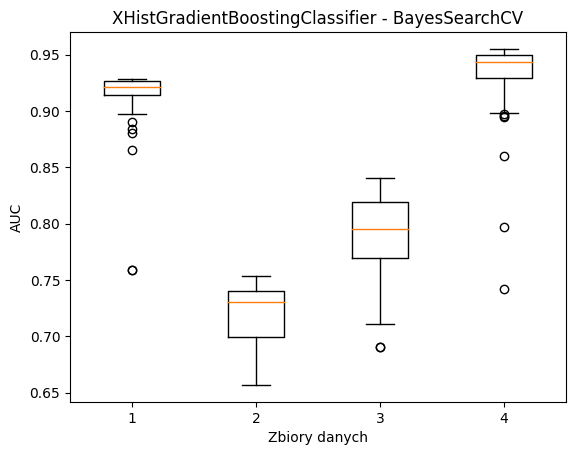

In [7]:
plt.boxplot([results_bs["a_scores"],results_bs1["scores"],results_bs2["scores"],results_bs3["scores"]])
plt.title("XHistGradientBoostingClassifier - BayesSearchCV")
plt.xlabel("Zbiory danych")
plt.ylabel("AUC")
plt.show()

In [ ]:
ox = range(1,51,1)

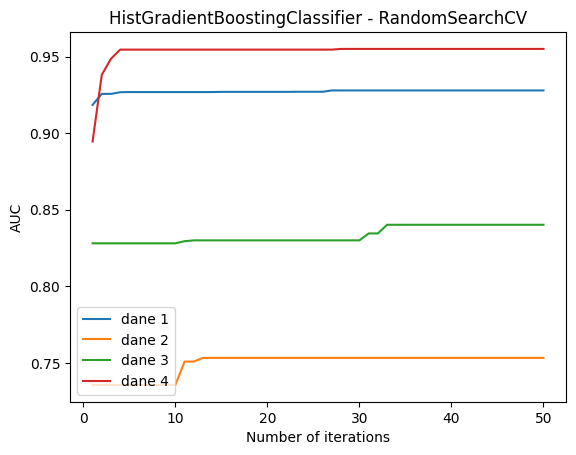

In [ ]:
plt.plot(ox, np.maximum.accumulate(results_bs['a_scores']), label='dane 1')
plt.plot(ox, np.maximum.accumulate(results_bs1['scores']), label='dane 2')
plt.plot(ox, np.maximum.accumulate(results_bs2['scores']), label='dane 3')
plt.plot(ox, np.maximum.accumulate(results_bs3['scores']), label='dane 4')
plt.legend()
plt.title("HistGradientBoostingClassifier - RandomSearchCV")
plt.xlabel("Number of iterations")
plt.ylabel("AUC")
plt.show()

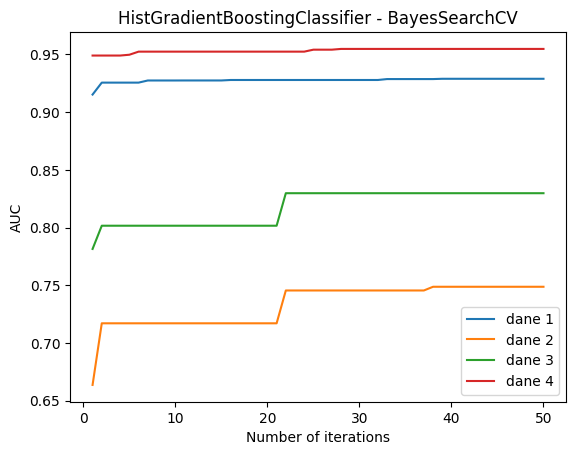

In [ ]:
plt.plot(ox, np.maximum.accumulate(results_rs['a_scores']), label='dane 1')
plt.plot(ox, np.maximum.accumulate(results_rs['btsc_scores']), label='dane 2')
plt.plot(ox, np.maximum.accumulate(results_rs['d_scores']), label='dane 3')
plt.plot(ox, np.maximum.accumulate(results_rs['ba_scores']), label='dane 4')
plt.legend()
plt.title("HistGradientBoostingClassifier - BayesSearchCV")
plt.xlabel("Number of iterations")
plt.ylabel("AUC")
plt.show()

# Algorythm tunability

RandomSearchCV

In [ ]:
results_rs["mean"] = results_rs.iloc[:,[1,2,3,4]].mean(axis=1)

In [ ]:
print(results_rs.loc[results_rs["mean"] == max(results_rs["mean"]),["params", "mean"]].values)

[["{'learning_rate': 0.08065652344255954, 'max_depth': 5, 'max_iter': 42, 'max_leaf_nodes': 22, 'min_samples_leaf': 30}"
  0.8558571936564173]]


In [ ]:
print(results_rs.loc[results_rs["a_scores"]==np.max(results_rs["a_scores"])]["params"].values)
print(np.max(results_rs["a_scores"]))

["{'learning_rate': 0.08668290488801562, 'max_depth': 5, 'max_iter': 438, 'max_leaf_nodes': 16, 'min_samples_leaf': 18}"]
0.9288764392857372


In [ ]:
print(results_rs.loc[results_rs["btsc_scores"]==np.max(results_rs["btsc_scores"])]["params"].values)
print(np.max(results_rs["btsc_scores"]))

["{'learning_rate': 0.04337936291096787, 'max_depth': 1, 'max_iter': 191, 'max_leaf_nodes': 21, 'min_samples_leaf': 36}"]
0.7486439668705678


In [ ]:
print(results_rs.loc[results_rs["d_scores"]==np.max(results_rs["d_scores"])]["params"].values)
print(np.max(results_rs["d_scores"]))

["{'learning_rate': 0.08065652344255954, 'max_depth': 5, 'max_iter': 42, 'max_leaf_nodes': 22, 'min_samples_leaf': 30}"]
0.8297236919459141


In [ ]:
print(results_rs.loc[results_rs["ba_scores"]==np.max(results_rs["ba_scores"])]["params"].values)
print(np.max(results_rs["ba_scores"]))

["{'learning_rate': 0.5553757580816079, 'max_depth': 12, 'max_iter': 386, 'max_leaf_nodes': 45, 'min_samples_leaf': 6}"]
0.9547548712483629


In [ ]:
results_rs

,params,a_scores,btsc_scores,d_scores,ba_scores,mean
0,"{'learning_rate': 0.9450516368287338, 'max_dep...",0.915209,0.663589,0.781424,0.949016,0.827309
1,"{'learning_rate': 0.31657554078015204, 'max_de...",0.925552,0.716987,0.801548,0.936260,0.845087
2,"{'learning_rate': 0.7480210086215892, 'max_dep...",0.920860,0.667860,0.769826,0.922914,0.820365
3,"{'learning_rate': 0.5826763109792318, 'max_dep...",0.924289,0.682966,0.782728,0.944801,0.833696
4,"{'learning_rate': 0.707977955004843, 'max_dept...",0.923667,0.685196,0.755512,0.949723,0.828525
5,"{'learning_rate': 0.707899860636529, 'max_dept...",0.921144,0.661131,0.779096,0.952397,0.828442
6,"{'learning_rate': 0.14346386902512515, 'max_de...",0.927399,0.657190,0.795720,0.951301,0.832903
7,"{'learning_rate': 0.3396494663402365, 'max_dep...",0.927096,0.671646,0.781218,0.949266,0.832307
8,"{'learning_rate': 0.9035091434660598, 'max_dep...",0.923820,0.684717,0.750733,0.941309,0.825145
9,"{'learning_rate': 0.3720293061931484, 'max_dep...",0.926524,0.695933,0.780567,0.948241,0.837816


BayesSearchCV

In [ ]:
print(results_bs.loc[results_bs["a_scores"] == max(results_bs["a_scores"])].values)

[["OrderedDict([('learning_rate', 0.09685712232788922), ('max_depth', 9), ('max_iter', 377), ('max_leaf_nodes', 34), ('min_samples_leaf', 50)])"
  0.9279476630226732]]


In [ ]:
print(results_bs1.loc[results_bs1["scores"] == max(results_bs1["scores"])].values)

[["OrderedDict([('learning_rate', 0.01), ('max_depth', 1), ('max_iter', 500), ('max_leaf_nodes', 50), ('min_samples_leaf', 19)])"
  0.7532046770963028]]


In [ ]:
print(results_bs2.loc[results_bs2["scores"] == max(results_bs2["scores"])].values)

[["OrderedDict([('learning_rate', 0.09733944432468274), ('max_depth', 1), ('max_iter', 183), ('max_leaf_nodes', 2), ('min_samples_leaf', 1)])"
  0.8401737948265726]]


In [ ]:
print(results_bs3.loc[results_bs3["scores"] == max(results_bs3["scores"])].values)

[[OrderedDict([('learning_rate', 0.4227996021902473), ('max_depth', 15), ('max_iter', 179), ('max_leaf_nodes', 39), ('min_samples_leaf', 23)])
  0.9550681721034542]]
